# Graphique pour l'imbalance et la correlation des features

## Import des librairies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import imblearn

## Import des données

In [2]:
df = pd.read_csv('donnée/data_rdy.csv')
train_df = df[df['TARGET'].notnull()]

# Destiné à Kaggle
test_df = df[df['TARGET'].isnull()]

## Imbalance

In [3]:
# On regarde si il y a une imbalance

imbalance = dict(train_df['TARGET'].value_counts()/len(train_df['TARGET'])*100)
imbalance

{0.0: 91.92701304360551, 1.0: 8.07298695639449}

In [4]:
imbalance.values()

dict_values([91.92701304360551, 8.07298695639449])

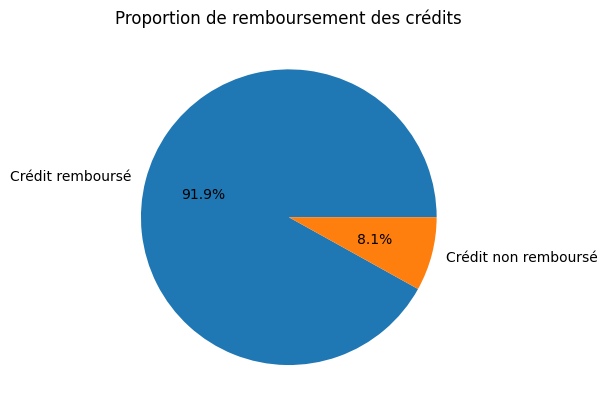

In [5]:
plt.title('Proportion de remboursement des crédits')
plt.pie(imbalance.values(),labels = ['Crédit remboursé','Crédit non remboursé'],autopct='%1.1f%%');

## Feature

In [6]:
# On retire les informations qui ne sont pas des features

feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

correlation = train_df[feats].corrwith(train_df['TARGET'])

feature = list(correlation.abs().sort_values(ascending=False)[:20].index)

In [7]:
correlation_20 = correlation.loc[feature]

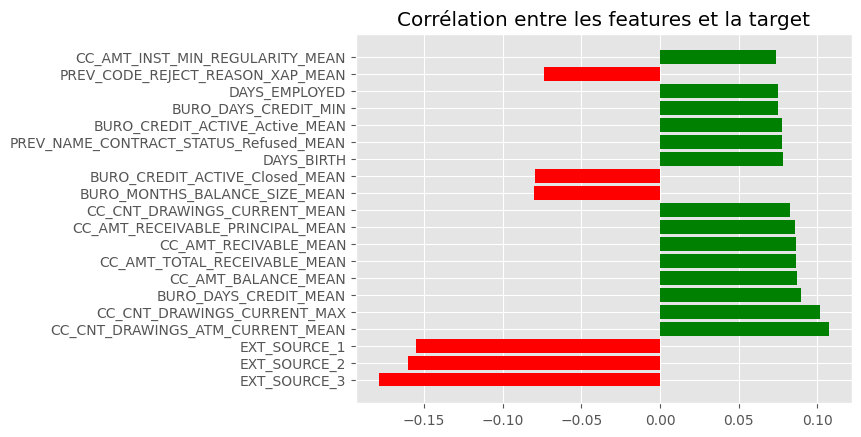

In [8]:
with plt.style.context("ggplot"):
    plt.barh(range(len(correlation_20)),correlation_20.values,\
             color=["red" if coef<0 else "green" for coef in correlation_20.values])
    plt.yticks(range(len(correlation_20)), correlation_20.index)
    plt.title('Corrélation entre les features et la target');

## Imbalance avec feature

In [9]:
train_rdy = train_df.dropna(subset = feature)

imbalance_feature = dict(train_rdy['TARGET'].value_counts()/len(train_rdy['TARGET'])*100)
imbalance_feature

{0.0: 90.37421817025336, 1.0: 9.625781829746634}

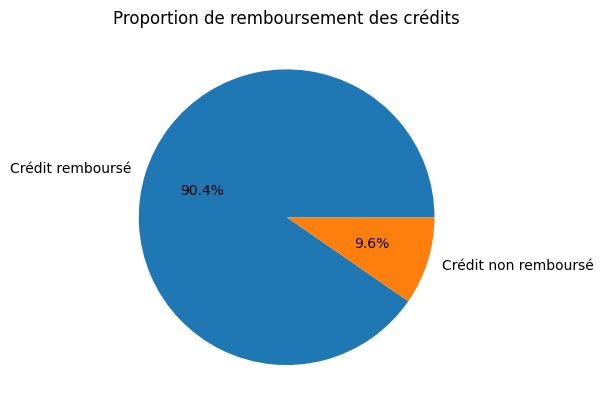

In [10]:
plt.title('Proportion de remboursement des crédits')
plt.pie(imbalance_feature.values(),labels = ['Crédit remboursé','Crédit non remboursé'],autopct='%1.1f%%');